In [1]:
import sys
sys.path.insert(1, "../")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xarray as xr

import advtraj.utils.interpolation as advtraj_interp
import advtraj.cli.uclales as uclales_cli

%matplotlib widget

In [3]:
ds_traj = xr.open_dataset("../rico.trajectories.nc")
ds_traj.z

<xarray.DataArray 'z' (time: 31)>
array([985.873413, 960.874756, 935.878235, 910.882812, 885.889587, 860.903992,
       835.935364, 810.980469, 785.93689 , 760.302368, 732.140137, 694.639709,
       637.3797  , 593.463562, 486.470123, 422.833862, 365.506683, 261.871552,
       160.446014, 107.338486,  63.113987,  53.786018,  65.005821,  65.114372,
        54.627396,  47.422379,  45.729866,  54.094196,  94.61367 , 206.517624,
       387.5     ])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-01T01:00:00
Attributes:
    units:    m

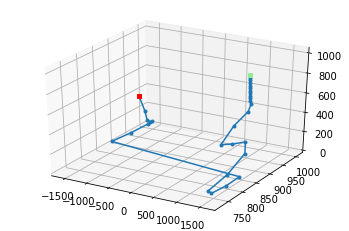

In [4]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.plot(ds_traj.x, ds_traj.y, ds_traj.z, marker='.')
ds_ = ds_traj.isel(time=0)
ax.scatter(ds_.x, ds_.y, ds_.z, marker='s', color="lightgreen")
ds_ = ds_traj.isel(time=-1)
ax.scatter(ds_.x, ds_.y, ds_.z, marker='s', color="red")

In [7]:
#ds = uclales_cli.load_data("/home/earlcd/git-repos/uclales/rico.????????.nc", fields_to_keep=["q", "w"])
ds = uclales_cli.load_data("~/Desktop/tmp/rico.????????.nc", fields_to_keep=["q", "w"])

(0, 1032.8805904388428)

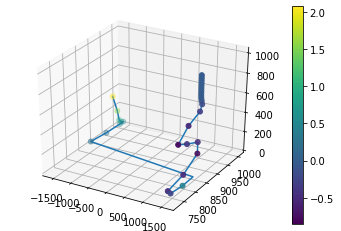

In [10]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

da_val_traj = ds.w.interp(ds_traj)
g = ax.plot(ds_traj.x, ds_traj.y, ds_traj.z,)

g = ax.scatter(ds_traj.x, ds_traj.y, ds_traj.z, marker='.', c=da_val_traj.values, s=100)

fig.colorbar(g)
ax.set_zlim(0, None)

In [11]:
# Plotting with mean wind subtracted

In [12]:
da_dt = ds_traj.time - ds_traj.time.isel(time=0)

In [13]:
# compute time elapsed in seconds
dt = da_dt.dt.seconds + da_dt.dt.days*24*60*60

u, v = 0., 0.
ds_traj['x_offset'] = ds_traj.x - dt*u
ds_traj['y_offset'] = ds_traj.y - dt*v
ds_traj

<xarray.Dataset>
Dimensions:   (time: 31)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2000-01-01T01:00:00
Data variables:
    x         (time) float64 1.469e+03 1.469e+03 ... -1.551e+03 -1.562e+03
    y         (time) float64 875.0 875.0 875.0 875.0 ... 998.3 987.7 979.9 962.5
    z         (time) float64 985.9 960.9 935.9 910.9 ... 54.09 94.61 206.5 387.5
    x_offset  (time) float64 1.469e+03 1.469e+03 ... -1.551e+03 -1.562e+03
    y_offset  (time) float64 875.0 875.0 875.0 875.0 ... 998.3 987.7 979.9 962.5

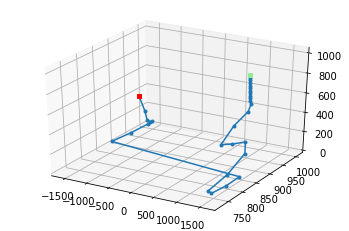

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.plot(ds_traj.x_offset, ds_traj.y_offset, ds_traj.z, marker='.')
ds_ = ds_traj.isel(time=0)
ax.scatter(ds_.x_offset, ds_.y_offset, ds_.z, marker='s', color="lightgreen")
ds_ = ds_traj.isel(time=-1)
ax.scatter(ds_.x_offset, ds_.y_offset, ds_.z, marker='s', color="red")